In [119]:
import requests
# pprint is pretty print (formats the JSON)
from pprint import pprint
from IPython.display import HTML
import json
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

In [120]:
subscription_key = 'e41c34b3bcf841d0859d6aba9e8e1494'
assert subscription_key

In [121]:
text_analytics_base_url = "https://westcentralus.api.cognitive.microsoft.com/text/analytics/v2.1/"

In [122]:
tweets = pd.read_csv('output_with_sentiment.csv', index_col = 0)

In [123]:
language_api_url = text_analytics_base_url + "languages"
print(language_api_url)

https://westcentralus.api.cognitive.microsoft.com/text/analytics/v2.1/languages


In [124]:
documents = { 'documents': [
    { 'id': '1', 'text': 'This is a document written in English.' },
    { 'id': '2', 'text': 'Este es un document escrito en Español.' },
    { 'id': '3', 'text': '这是一个用中文写的文件' }
]}

In [125]:
headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(language_api_url, headers=headers, json=documents)
languages = response.json()
pprint(languages)

{'documents': [{'detectedLanguages': [{'iso6391Name': 'en',
                                       'name': 'English',
                                       'score': 1.0}],
                'id': '1'},
               {'detectedLanguages': [{'iso6391Name': 'es',
                                       'name': 'Spanish',
                                       'score': 1.0}],
                'id': '2'},
               {'detectedLanguages': [{'iso6391Name': 'zh_chs',
                                       'name': 'Chinese_Simplified',
                                       'score': 1.0}],
                'id': '3'}],
 'errors': []}


In [179]:
x = languages['documents'][1]

In [182]:
new_lang_dict = {}
for entry in languages['documents']:
    new_lang_dict[entry['id']] = entry['detectedLanguages'][0]['iso6391Name']
new_lang_dict

{'1': 'en', '2': 'es', '3': 'zh_chs'}

In [181]:
count = 1
for entry in new_lang_dict:
    str_count = str(count)
    
    print(new_lang_dict[str_count])
    count+=1

en
es
zh_chs


In [172]:
str(0)

'0'

In [80]:
sentiment_api_url = text_analytics_base_url + "sentiment"
print(sentiment_api_url)

https://westcentralus.api.cognitive.microsoft.com/text/analytics/v2.1/sentiment


In [81]:
documents = {'documents' : [
  {'id': '1', 'language': 'en', 'text': 'I had a wonderful experience! The rooms were wonderful and the staff was helpful.'},
  {'id': '2', 'language': 'en', 'text': 'I had a terrible time at the hotel. The staff was rude and the food was awful.'},  
  {'id': '3', 'language': 'es', 'text': 'Los caminos que llevan hasta Monte Rainier son espectaculares y hermosos.'},  
  {'id': '4', 'language': 'es', 'text': 'La carretera estaba atascada. Había mucho tráfico el día de ayer.'}
]}
documents

{'documents': [{'id': '1',
   'language': 'en',
   'text': 'I had a wonderful experience! The rooms were wonderful and the staff was helpful.'},
  {'id': '2',
   'language': 'en',
   'text': 'I had a terrible time at the hotel. The staff was rude and the food was awful.'},
  {'id': '3',
   'language': 'es',
   'text': 'Los caminos que llevan hasta Monte Rainier son espectaculares y hermosos.'},
  {'id': '4',
   'language': 'es',
   'text': 'La carretera estaba atascada. Había mucho tráfico el día de ayer.'}]}

In [82]:
headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(sentiment_api_url, headers=headers, json=documents)
sentiments = response.json()
pprint(sentiments)

{'documents': [{'id': '1', 'score': 0.9708490371704102},
               {'id': '2', 'score': 0.0019068121910095215},
               {'id': '3', 'score': 0.7456425428390503},
               {'id': '4', 'score': 0.334433376789093}],
 'errors': []}


In [83]:
tweets.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentiment,len
0,fran0506,2019-02-22 18:57:00,0,1,"Si así estuvo el día de hoy, como sera mañana ...",NaN,NaN,# #,1099095851434151936,https://twitter.com/fran0506/status/1099095851...,0.635764,82
1,antjgo,2019-02-22 18:46:00,0,2,Esta noche será larga para los uniformados y d...,NaN,@,# # # #,1099093000213463040,https://twitter.com/antjgo/status/109909300021...,0.576211,199
2,liarclothingve,2019-02-22 18:40:00,0,0,Pampatar T-shirt Dale like Etiqueta a un amig...,NaN,NaN,# # # # # # # # # # # # # # # # # # #,1099091668387672065,https://twitter.com/liarclothingve/status/1099...,0.329231,310
3,JesusMendozaJ,2019-02-22 18:39:00,0,0,El día de mañana # 23F será un día muy movido ...,NaN,NaN,# # # # #,1099091306717040640,https://twitter.com/JesusMendozaJ/status/10990...,0.685189,175
4,csancheznieto,2019-02-22 18:15:00,1,5,"Venezuela y sus contradicciones, nunca aprendi...",NaN,@VenezuelaAidLive,# #,1099085399505330176,https://twitter.com/csancheznieto/status/10990...,0.062046,278


In [84]:
x = json.dumps(sentiments)

In [92]:
def compile_doc(df):
    id_count = 0
    documents = {'documents': []}
    for text in df['text']:
        
        documents['documents'].append({'id': '{}'.format(id_count), 'language': 'es', 'text': text})
        id_count += 1
    
    return documents


documents = compile_doc(tweets)

In [108]:
headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(sentiment_api_url, headers=headers, json=documents)
sentiments = response.json()
#pprint(sentiments)

In [109]:
sents = []
for entry in sentiments['documents']:
    sents.append(entry['score'])
    
tweets['MS_sentiment'] = sents

In [111]:
print('Tweet: ', tweets['text'][1])
print()
print(tweets['MS_sentiment'][1])
print()
print('Bing translate: Tonight will be long for the uniformed and decisive for their future, last call will be tomorrow to be put on the right side # \
VenezuelaAidLive # Venezuela # AyudaHumanitaria # 23F @ marcorubio ')

Tweet:  Esta noche será larga para los uniformados y decisiva para su futuro, último llamado será mañana a que se pongan del lado correcto # VenezuelaAidLive # Venezuela # AyudaHumanitaria # 23F @ marcorubio

0.6882950067520142

Bing translate: Tonight will be long for the uniformed and decisive for their future, last call will be tomorrow to be put on the right side # VenezuelaAidLive # Venezuela # AyudaHumanitaria # 23F @ marcorubio 


In [113]:
print('Tweet: ', tweets['text'][11])
print()
print(tweets['MS_sentiment'][11])
print()
print("Bing translate: Venezuela, you're on a wrestling foot. In Dominican Republic we pray for you, kneel before God. They're not alone!!!! \
# 23F # VenezuelaLibre # MADUROCONOETUMADRE # VenezuelaLiveAidpic.twitter.com/MnFezXXSEU")

Tweet:  # Venezuela, tu estas en Pie de Lucha. En # Dominicana oramos por ti, de rodillas ante # Dios. No Están Solos!!!! # 23F # VenezuelaLibre # MADUROCONOETUMADRE # VenezuelaLiveAidpic.twitter.com/MnFezXXSEU

0.5303567051887512

Bing translate: Venezuela, you're on a wrestling foot. In Dominican Republic we pray for you, kneel before God. They're not alone!!!! # 23F # VenezuelaLibre # MADUROCONOETUMADRE # VenezuelaLiveAidpic.twitter.com/MnFezXXSEU


In [117]:
print('Tweet: ', tweets['text'][110])
print()
print(tweets['MS_sentiment'][110])
print()
print("Bing translate: Do not be so excited about # Guaido either... Remember that it is also socialist... is to change poop rotted by fresh poop in \
# Venezuela # LiveAidVenezuela # 23F pic.twitter.com/NAE6lWD9qu")

Tweet:  No se ilusionen tanto con # Guaido tampoco... recuerden que también es socialista... es cambiar caca podrida por caca fresca en # Venezuela # LiveAidVenezuela # 23F pic.twitter.com/NAE6lWD9qu

0.1551724076271057

Bing translate: Do not be so excited about # Guaido either... Remember that it is also socialist... is to change poop rotted by fresh poop in # Venezuela # LiveAidVenezuela # 23F pic.twitter.com/NAE6lWD9qu


Text(0.5, 1.0, 'Distribution of sentiment scores from text')

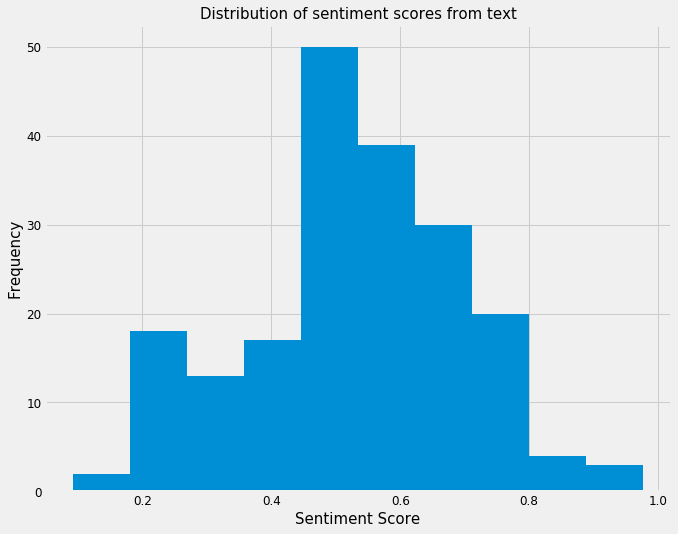

In [103]:
tweets['MS_sentiment'].plot.hist()
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of sentiment scores from text', fontsize = 15)

Text(0.5, 1.0, 'Compaison of sentiment scores from MS API and Spanish sentiment classifier')

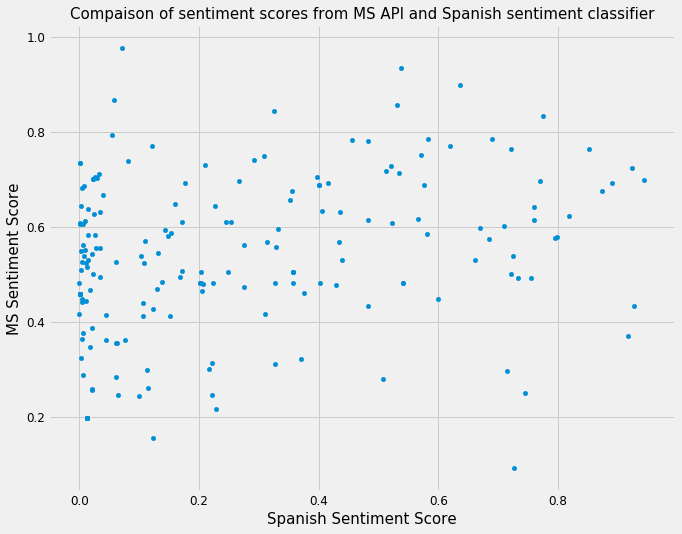

In [104]:
tweets.plot.scatter(x='sentiment', y = 'MS_sentiment')
plt.xlabel('Spanish Sentiment Score')
plt.ylabel('MS Sentiment Score')
plt.title('Compaison of sentiment scores from MS API and Spanish sentiment classifier', fontsize = 15)

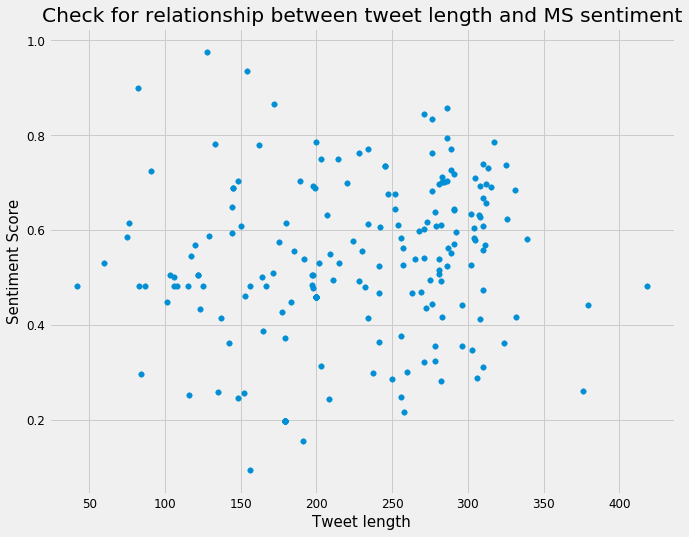

In [105]:
tweets.plot.scatter('len', 'MS_sentiment', s=30)
plt.xlabel('Tweet length')
plt.ylabel('Sentiment Score')
plt.title('Check for relationship between tweet length and MS sentiment')
plt.show()

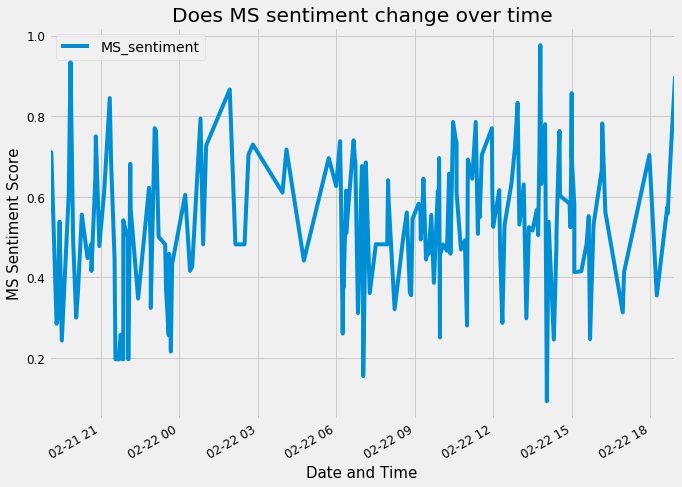

In [107]:
tweets['date'] = pd.to_datetime(tweets['date'])

tweets.plot(x = 'date', y='MS_sentiment')
plt.xlabel('Date and Time')
plt.ylabel('MS Sentiment Score')
plt.title('Does MS sentiment change over time')
plt.show()

In [118]:
tweets.to_csv('output_with_MS_sentiment.csv')